In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Runs in about 70s
sim = deorbit.simulator.run(
    "adams_bashforth",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
    time_step=0.1,
    noise_strength=0.01,
    noise_type = "Gaussian"
)

print(type(sim))

Running simulation with Two-step Adams-Bashforth integrator
Ran 260033 iterations at time step of 0.1 seconds
Impacted at [ 5343534.1384923  -3469334.51005969] at velocity [-41.66853729  27.05364851] at simulated time 26003.399999902093s.
Simulation finished in 6.21875 seconds
<class 'deorbit.simulator.simulator.AdamsBashforthSimulator'>


In [3]:
save_path = sim.save_data("eg/", format="pkl")

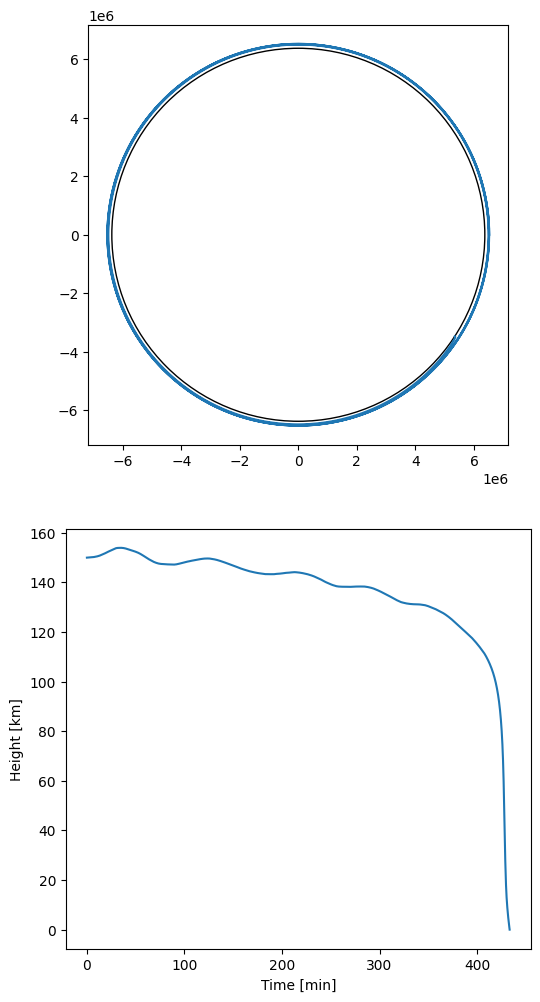

In [4]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(6)
states = np.array(sim.states)
ax[0].plot(states[:, 0], states[:, 1])
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax[0].add_patch(earth)
ax[0].axis("scaled")
ax[1].plot(np.array(sim.times) / 60, (np.linalg.norm(states[:, :2], axis=1) - deorbit.constants.EARTH_RADIUS)/1000)
ax[1].set_ylabel("Height [km]")
ax[1].set_xlabel("Time [min]")
plt.show()

In [7]:
sim2 = deorbit.simulator.run(
    "adams_bashforth",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
    time_step=0.1,
    noise_strength=3.0,
    noise_type = "Impulse"
)

print(type(sim2))

Running simulation with Two-step Adams-Bashforth integrator
Ran 231769 iterations at time step of 0.1 seconds
Impacted at [-4347963.4371537   4656696.30985954] at velocity [ 33.90435289 -36.31177614] at simulated time 23176.999999943222s.
Simulation finished in 6.79688 seconds
<class 'deorbit.simulator.simulator.AdamsBashforthSimulator'>


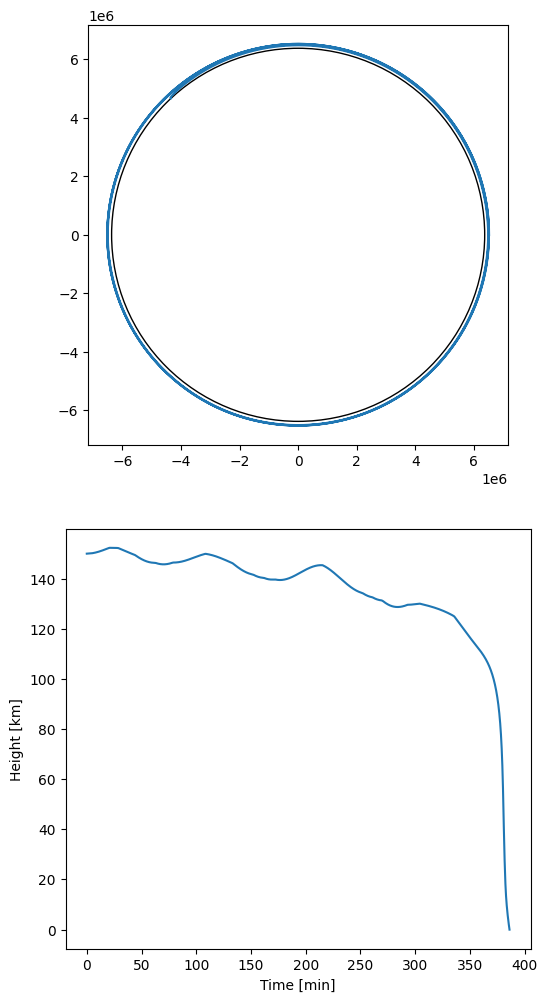

In [8]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(6)
states = np.array(sim2.states)
ax[0].plot(states[:, 0], states[:, 1])
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax[0].add_patch(earth)
ax[0].axis("scaled")
ax[1].plot(np.array(sim2.times) / 60, (np.linalg.norm(states[:, :2], axis=1) - deorbit.constants.EARTH_RADIUS)/1000)
ax[1].set_ylabel("Height [km]")
ax[1].set_xlabel("Time [min]")
plt.show()